## Michelson-Interferometer

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

from scipy.optimize import curve_fit
from matplotlib import pyplot
from scipy import signal

In [2]:
e = 1.361e-3
a = 4.315e-3
fe = 0.009e-3
fa = 0.009e-3
m = 11129


lam = 2*(e-a)/m
flam = 2*sqrt(fe**2+fa**2)/m
print(lam)
print(flam)

-5.30865306855962e-07
2.2873433482537257e-09


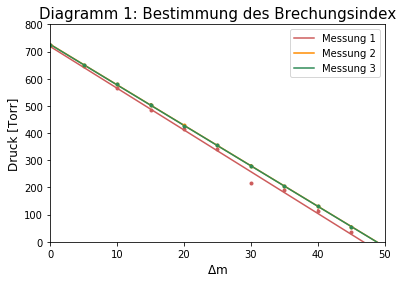

In [3]:
x=np.linspace(0,50,10000)

#Eingabe der Messdaten

y1=np.array([725,645,565,485,415,340,215,190,115,35])
x1=np.array([0,5,10,15,20,25,30,35,40,45])
y1_e=np.array([5,5,5,5,5,5,5,5,5,5])

y2=np.array([725,650,580,505,430,355,280,205,130,55])
x2=np.array([0,5,10,15,20,25,30,35,40,45])
y2_e=np.array([5,5,5,5,5,5,5,5,5,5])

y3=np.array([725,650,580,505,425,355,280,205,130,55])
x3=np.array([0,5,10,15,20,25,30,35,40,45])
y3_e=np.array([5,5,5,5,5,5,5,5,5,5])



#Fitten und Plotten der Messdaten

from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b

popt1, pcov1 = curve_fit(linear, x1, y1, sigma=y1_e)
plt.plot(x,linear(x,*popt1), color='indianred', label='Messung 1')
plt.errorbar(x1,y1,yerr=y1_e,fmt='.',color='indianred')

popt2, pcov2 = curve_fit(linear, x2, y2, sigma=y2_e)
plt.plot(x,linear(x,*popt2), color='darkorange', label='Messung 2')
plt.errorbar(x2,y2,yerr=y2_e,fmt='.', color='darkorange')

popt3, pcov3 = curve_fit(linear, x3, y3, sigma=y3_e)
plt.plot(x,linear(x,*popt3), color='seagreen', label='Messung 3')
plt.errorbar(x3,y3,yerr=y3_e,fmt='.', color='seagreen')

plt.ylabel('Druck [Torr]', size=12)
plt.xlabel('$\Delta$'+'m', size=12)
plt.title('Diagramm 1: Bestimmung des Brechungsindex', size=15)
plt.legend(loc='upper right')
plt.xlim(0,50)
plt.ylim(0,800)

plt.show()


In [4]:
#Steigungen berechnen

s1=popt1[0]
s1_e=np.sqrt(np.diag(pcov1))[0]
s2=popt2[0]
s2_e=np.sqrt(np.diag(pcov2))[0]
s3=popt3[0]
s3_e=np.sqrt(np.diag(pcov3))[0]

s=np.mean([s1,s2,s3])
s_e1=np.sqrt(s1_e**2+s2_e**2+s3_e**2)/5
s_e2=np.std([s1,s2,s3])/np.sqrt(3)
s_e=np.sqrt(s_e1**2+s_e2**2)
print('s1 = ',s1)
print('s2 = ',s2)
print('s3 = ',s3)
print('Mittelwert der Steigungen = ',s)
print('sys. Fehler = ',s_e1)
print('stat. Fehler = ',s_e2)
print('tot. Fehler = ',s_e)

s1 =  -15.369696972
s2 =  -14.9030303033
s3 =  -14.8969696968
Mittelwert der Steigungen =  -15.0565656574
sys. Fehler =  0.0737204911346
stat. Fehler =  0.12784330504
tot. Fehler =  0.147575815961


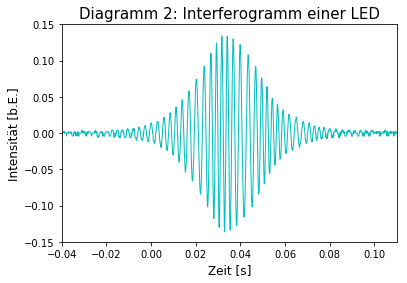

In [5]:
data=np.genfromtxt('C:\\Users\\user\\Downloads\\NewFile0.CSV',delimiter=",",skip_header=2) 

t=data[:,0:1] #Zeit
Int=data[:,1:2] #Intensitaet
Int=Int[:, 0] #in 1D-array wandeln
t=t[:, 0]

plt.plot(t,Int, color='c', linewidth=1)
plt.xlabel('Zeit '+'[s]', size=12)
plt.ylabel('Intensität '+'[b.E.]', size=12)
plt.title('Diagramm 2: Interferogramm einer LED', size=15)
plt.axis([-0.04,0.11, -0.15, 0.15])

plt.show()

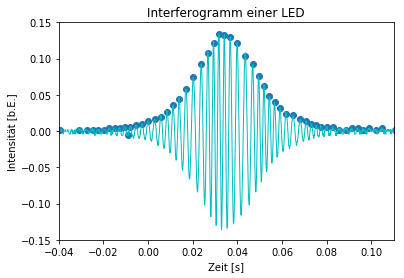

In [6]:
#Konstruktion der Einhüllenden

peakind = signal.find_peaks_cwt(Int, np.arange(1,30),noise_perc=20)
plt.plot(t[peakind], Int[peakind],marker='o',linewidth=0)
plt.plot(t,Int, color='c', linewidth=1)
plt.xlabel('Zeit '+'[s]')
plt.ylabel('Intensität '+'[b.E.]')
plt.title('Interferogramm einer LED')
plt.axis([-0.04,0.11, -0.15, 0.15])
plt.show()

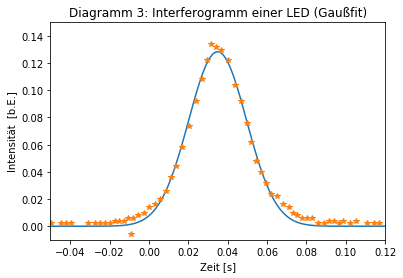

In [9]:
#Fitten und Plotten der Gaußkurve

def gauss(t,b,c,a):
    return b*np.exp(-(t-c)**2/(2*a**2))
init_vals = [0.002, 0.032, 0.015]
fitParams, fitCovariances = curve_fit(gauss, t[peakind], Int[peakind],p0=init_vals)
x=np.linspace(-0.05,0.12,100)
plt.plot(x, gauss(x, fitParams[0], fitParams[1], fitParams[2]))
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit '+'[s]')
plt.ylabel('Intensität '+' [b.E.]')
plt.title('Diagramm 3: Interferogramm einer LED (Gaußfit)')
plt.axis([-0.05, 0.12, -0.01, 0.15])

plt.show()

In [8]:
#Ausgabe von Sigma

print("Sigmabreite =",fitParams[2],"s")
print("Fehler von Sigma =",np.sqrt(fitCovariances[2][2]),"s")

Sigmabreite = 0.0146873400356 s
Fehler von Sigma = 0.000108974435115 s
